# Author : Riya Soni

## Task 1 : Prediction using Supervised Machine Learning

### GRIP @ The Sparks Foundation

### Objective: 
<br>
I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
<br>
This shows it is a simple linear Regression task as it involves just two variables.

#### Technical Stack

In [40]:
#importing all the required libraries

import pandas as pd 
import numpy as np

#Basic Visualization
import matplotlib.pyplot as plt 

#Model Trainig and Evaluating
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Reading and Manipulating dataset

In [109]:
#fetching dataset
file = 'study.csv'

#Reading
rfile = pd.read_csv(file)

#Printing
print(rfile) #or rfile.head()

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


### Data Visualization

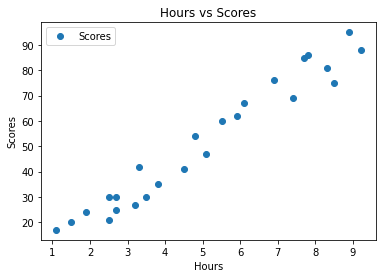

In [110]:
#Plotting the distribution of scores
rfile.plot(x = 'Hours',y = 'Scores', style = 'o')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs Scores')
plt.show()

From the above graph, I have assume the relation between number of hours studied and percentage of score is **Positive Linear Relation**

### Data Preprocessing
<br>

Here, I have divide the data in two formats - **(Attributes) Inputs** and **(labels) Output**

In [111]:
#Reshaping 1D array to 2D array for Model
x = rfile.iloc[:, :-1].values 
y = rfile.iloc[:, 1].values

In [112]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [68]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Model Training
<br>
I have split the data in two sets : <b>Training</b> and <b>Testing</b>  to test the machine learning algorithm based on <i>supervised learning.</i>

In [113]:
#Assigning the data to variables
xtrain , xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [122]:
print(xtrain, ytrain)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]] [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [121]:
print(xtest, ytest)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]] [20 27 69 30 62]


In [114]:
regg = LinearRegression()

#For accuracy
regg.fit(xtrain,ytrain)
print('The Algorithm is trained')

trained


### Line of Regression

In [115]:
#Plotting Line of Regression
line = regg.coef_*x+regg.intercept_

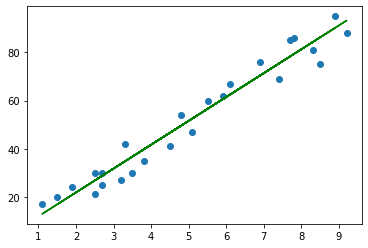

In [116]:
#Plotting for the test data
plt.scatter(x,y)

#Actual Value and Line of Regression
plt.plot(x,line, color = "green")
plt.show()

### Predictions
<br>
I have trained my algorithm, now its time to make predictions using <b>test data set.</b>

In [123]:
#Model prediction
scorepred = regg.predict(xte)

#Predicted Output
scorepred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Time to compare actual result to my predicted model    result

In [129]:
df = pd.DataFrame({'Actual Value' : ytest, 'Predicted Value' : scorepred})
df

,Actual Value,Predicted Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


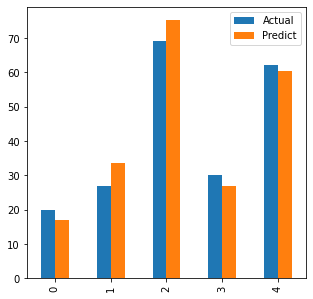

In [128]:
#Visual Disfference between actual value and Predicted value
df.plot(kind = 'bar', figsize=(5,5))
plt.grid(which= 'major', linewidth='0.5', color='Blue')
plt.grid(which= 'major', linewidth='0.5', color='Green')
plt.show()

### (2)Testing model with given input

In [107]:
hours = np.array([9.25])
hrs = hours.reshape(1,-1)
customtest = regg.predict(hrs)
print('No. of Hours : {}' .format(hours))
print('Predicted Score : {}'.format(customtest[0]))

No. of Hours : [9.25]
Predicted Score : 93.69173248737538


### Evaluating the model
<br>
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

<br>
R-2 gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is actually a great score for this model.

In [130]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(ytest, scorepred))
print('Mean Absolute Error:',metrics.mean_absolute_error(ytest, scorepred)) 
print('Mean Squared Error:', metrics.mean_squared_error(ytest, scorepred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, scorepred)))
print('R-2:', metrics.r2_score(ytest, scorepred))

Mean Absolute Error :  4.183859899002975
Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


## Conclusion

#### I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.

### Thank You